# **Problem Statement**

We will explore from this [dataset](https://www.kaggle.com/c/GiveMeSomeCredit/data), we learn about credit scoring using simple technique, logistic regression. Information dataset will show here, below:

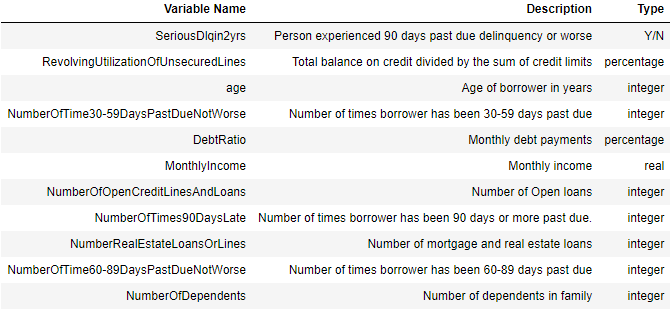

In [2]:
# generate dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d brycecf/give-me-some-credit-dataset

 97% 5.00M/5.16M [00:00<00:00, 15.8MB/s]
100% 5.16M/5.16M [00:00<00:00, 14.8MB/s]


In [3]:
# unzipping dataset
!unzip "give-me-some-credit-dataset.zip"

Archive:  give-me-some-credit-dataset.zip
  inflating: Data Dictionary.xls     
  inflating: cs-test.csv             
  inflating: cs-training.csv         
  inflating: sampleEntry.csv         


In [41]:
# import useful library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, f1_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [17]:
# prepare dataset
df_train = pd.read_csv("cs-training.csv", index_col=0)
df_test = pd.read_csv("cs-test.csv", index_col=0)
print("Shape of dataframe training: ", df_train.shape)
print("Shape of dataframe testing: ", df_test.shape)

Shape of dataframe training:  (150000, 11)
Shape of dataframe testing:  (101503, 11)


In [7]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [9]:
# check null dataset in Training
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
# check null dataset in Testing
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [24]:
# fill null data in number of dependents
df_train.NumberOfDependents.fillna(df_train.NumberOfDependents.median(), inplace=True)
df_test.NumberOfDependents.fillna(df_test.NumberOfDependents.median(), inplace=True)
df_train.MonthlyIncome.fillna(df_train.MonthlyIncome.mean(), inplace=True)
df_test.MonthlyIncome.fillna(df_test.MonthlyIncome.mean(), inplace=True)

# drop null data
df_train.dropna(inplace=True)
df_test.drop('SeriousDlqin2yrs', axis=1, inplace=True)

print("Shape of dataframe training after handling: ", df_train.shape)
print("Shape of dataframe testing after handling: ", df_test.shape)

Shape of dataframe training after handling:  (150000, 11)
Shape of dataframe testing after handling:  (101503, 10)


In [26]:
# check null dataset in Training
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [25]:
# check null dataset in Testing
df_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [32]:
# split dataset
X = df_train.drop(['SeriousDlqin2yrs'], axis=1)
y = df_train.SeriousDlqin2yrs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# modelling standar
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions for testing set
y_pred = model.predict(X_test)

# calculate testing accuracy
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9348666666666666


In [43]:
# Create k-folds
k = 5
kf = KFold(n_splits=k, random_state=42)
results = []
fone = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # make predictions for testing set
    y_pred = model.predict(X_test)

    # calculate testing accuracy
    results.append(accuracy_score(y_test, y_pred))
    fone.append(f1_score(y_test, y_pred))

avg_acc_score = sum(results)/k
fone_score = sum(fone)/k
print('Accuracy of each fold:\n{}'.format(results))
print('Avg accuracy : {}'.format(avg_acc_score))
print('F1 Score of each fold:\n{}'.format(fone))
print('F1 Score accuracy : {}'.format(fone_score))

Accuracy of each fold:
[0.9351333333333334, 0.931, 0.9349333333333333, 0.9331, 0.932]
Avg accuracy : 0.9332333333333335
F1 Score of each fold:
[0.0250501002004008, 0.022662889518413595, 0.03270564915758176, 0.026200873362445417, 0.027645376549094373]
F1 Score accuracy : 0.026852977757587194


In [40]:
k = 5
kf = KFold(n_splits=k, random_state=42)
model = LogisticRegression()
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9332333333333335


In [44]:
# FPR, TPR, THRESH for model
fpr1, tpr1, thresh1 = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

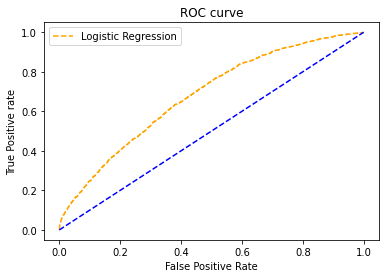

In [45]:
# Plot ROC
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best');